# Предсказание оттока клиентов 

Компания предоставляет услуги связи и интернет. Далее по тексту оператор связи. По статистическим данным нужно построить модель предсказания оттока клиентов

# Описание данных

Оператор связи нам предоставил для работы 4 датасета. Разберем каждый

В **contract.csv** представлена информация о договоре:

- **customerID** - уникальный ID клиента
- **BeginDate** - дата заключения договора
- **EndDate** - дата расторжения договора
- **Type** - Тип оплаты за услуги (ежемесячный платёж или раз в год, несколько лет)
- **PaperlessBilling** - Получает ли клиент электронный чек
- **PaymentMethod** - способы оплаты за услуги
- **MonthlyCharges** - ежемесячные платежи независимо от типа оплаты
- **TotalCharges** - Общая сумма платежа клиента

В **personal.csv** представлена информация о клиентах:

- **customerID** - уникальный ID клиента
- **BeginDate** - дата заключения договора
- **EndDate** - дата расторжения договора
- **Type** - Тип оплаты за услуги (ежемесячный платёж или раз в год, несколько лет)
- **PaperlessBilling** - Получает ли клиент электронный чек
- **PaymentMethod** - способы оплаты за услуги
- **MonthlyCharges** - ежемесячные платежи независимо от типа оплаты
- **TotalCharges** - Общая сумма платежа клиента

В **Internet.csv** представлена информация об интернет услугах:

- **customerID** - уникальный ID клиента
- **InternetService** - варианты подключения интернет-соединения
- **OnlineSecurity** - Услуга блокировки небезопасных сайтов
- **OnlineBackup** - Услуга Облачного хранилища файлов
- **DeviceProtection** - Наличие услуги антивируса
- **TechSupport** - Услуга Выделенной линии технической поддержки
- **StreamingTV** - Услуга стримингового телевидения
- **StreamingMovies** - Услуга каталога фильмов

В **phone.csv** представлена информация об услугах телефонии:

- **customerID** - уникальный ID клиента
- **MultipleLines** - Мультиканальная линия или нет (в данном случае отдельно услуга телефона связи или вместе с интернетом)

# План работы

- **Подготовить данные для анализа**:


    - Проверить на наличие дубликатов
    - Проверить на наличие пропусков
    - Привести форматы данных к необходимым
    - Выделить целевой признак
    - При необходимости добавить или удалить столбцы
       
- **Провести анализ данных**:


    - Объединить таблицы в один датасет
    - Посмотреть на распределение целевого признака
    - Выделить клиентов, которые ушли
    - Выяснить информацию по услугам, которые они получали
    - Выяснить информацию по оплате предоставляемых услуг
    
- **Обучить модель**:


    - Разделить датасет на обучающую и тестовую выборки
    - Обучить модели
    - Выбрать лучшую по результатам обучения на основе метрики rocauc
    - Проверить модель на тестовой выборке
    
- **Заключение**:

    
    - Итоговая модель и результат ее обучения
    - Выявление ключевых шагов в решении задачи
    - Отклонения от плана 

## Подготовка данных

Импортируем необходимые библиотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score 
import warnings
warnings.filterwarnings("ignore")

###  **contract**

In [2]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')
contract.sample(25, random_state=171022)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2187,8879-XUAHX,2014-03-01,No,Two year,Yes,Electronic check,116.25,8564.75
60,0434-CSFON,2016-03-01,No,Month-to-month,Yes,Electronic check,100.50,4707.1
2002,0017-DINOC,2015-08-01,No,Two year,No,Credit card (automatic),45.20,2460.55
5634,2320-JRSDE,2019-12-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,19.90,19.9
5974,7094-MSZAO,2019-04-01,No,Month-to-month,Yes,Credit card (automatic),20.05,218.5
1212,4291-SHSBH,2019-07-01,No,Month-to-month,Yes,Electronic check,69.55,521.35
6879,0682-USIXD,2018-05-01,No,Month-to-month,Yes,Electronic check,86.05,1818.9
4386,3400-ESFUW,2015-04-01,2019-11-01 00:00:00,Two year,No,Bank transfer (automatic),57.55,3046.4
4102,1919-RTPQD,2019-07-01,No,Month-to-month,No,Electronic check,44.75,333.65
2565,7996-BPXHY,2019-01-01,No,Two year,Yes,Bank transfer (automatic),25.00,332.5


Приведем названия столбцов в нижний регистр

In [3]:
contract.columns = contract.columns.str.lower()

Проверим на наличие дубликатов

In [4]:
contract.duplicated().sum()

0

проверим на наличие пропусков или нулевых значений

In [5]:
contract.isna().sum()

customerid          0
begindate           0
enddate             0
type                0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

In [6]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   begindate         7043 non-null   object 
 2   enddate           7043 non-null   object 
 3   type              7043 non-null   object 
 4   paperlessbilling  7043 non-null   object 
 5   paymentmethod     7043 non-null   object 
 6   monthlycharges    7043 non-null   float64
 7   totalcharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


При попытке перевести тип данных в формат float появилась ошибка 'ValueError: could not convert string to float: ''', значит в данных есть строки с пробелом, вместо пропуска. Посмотрим на эти данные и решим что с ними делать!

In [7]:
display(contract[contract['totalcharges'] == ' '])

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Всего 11 строк из 7043. Мы видим, что дата заключения контракта у всех клиентов 1 февраля 2020. Так как это дата выгрузки данных, мы можем сделать вывод, что данные клиенты еще не успели понять свои эмоции от представляемых услуг и для решения нашей задачи они не представляют никакой ценности. Удалим данные строки, ведь объединять таблицы будем по *customerid*

In [8]:
contract = contract.loc[contract['totalcharges'] != ' ']
contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   begindate         7032 non-null   object 
 2   enddate           7032 non-null   object 
 3   type              7032 non-null   object 
 4   paperlessbilling  7032 non-null   object 
 5   paymentmethod     7032 non-null   object 
 6   monthlycharges    7032 non-null   float64
 7   totalcharges      7032 non-null   object 
dtypes: float64(1), object(7)
memory usage: 494.4+ KB


Целевой признак выделим в отдельный столбец и сделаем его численным

In [9]:
def client_left(rows):
    if rows['enddate'] == 'No':
        return 0
    else:
        return 1

In [10]:
contract['client_left'] = contract.apply(client_left, axis=1)

Добавим столбец сколько времени был или есть с оператором связи клиент. Для этого нужно в столбце EndDate проставить дату 1 февраля 2020, то есть дату выгрузки данных

In [11]:
contract['enddate'] = contract['enddate'].replace('No', '2020-02-01')
contract['enddate'] = contract['enddate'].apply(pd.to_datetime)
contract['begindate'] = contract['begindate'].apply(pd.to_datetime)
contract['time_with_us'] = (contract['enddate'] - contract['begindate']).dt.days
contract.head()

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,client_left,time_with_us
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.5,0,1036
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61


Теперь столбцы с датами нам не нужны

In [12]:
contract = contract.drop('begindate', axis=1)
contract = contract.drop('enddate', axis=1)
contract.head()

,customerid,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,client_left,time_with_us
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,0,31
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.5,0,1036
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,1,61
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,1,61


In [13]:
contract.describe()

,monthlycharges,client_left,time_with_us
count,7032.000000,7032.000000,7032.000000
mean,64.798208,0.265785,987.538538
std,30.085974,0.441782,747.153663
min,18.250000,0.000000,30.000000
25%,35.587500,0.000000,275.000000
50%,70.350000,0.000000,883.000000
75%,89.862500,1.000000,1676.000000
max,118.750000,1.000000,2191.000000


### personal.csv

**Вывод**

В нашем датасете

In [14]:
personal = pd.read_csv('/datasets/final_provider/personal.csv')
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Приведем названия стобцов в нижний регистр

In [15]:
personal.columns = personal.columns.str.lower()

In [16]:
client_left = contract[contract['client_left'] == 1]
client_left.head()

,customerid,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,client_left,time_with_us
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,1,61
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,1,61
5,9305-CDSKC,Month-to-month,Yes,Electronic check,99.65,820.5,1,245
8,7892-POOKP,Month-to-month,Yes,Electronic check,104.80,3046.05,1,853
13,0280-XJGEX,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,1491


In [17]:
personal.duplicated().sum()

0

In [18]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     7043 non-null   object
 1   gender         7043 non-null   object
 2   seniorcitizen  7043 non-null   int64 
 3   partner        7043 non-null   object
 4   dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Для дальнейшей работы переведем столбец gender в численный формат. Для этого создадим столбец **is_male**

In [19]:
def is_male(rows):
    if rows['gender'] == 'Female':
        return 0
    else:
        return 1

In [20]:
personal['is_male'] = personal.apply(is_male, axis=1)
personal = personal.drop('gender',axis=1)
personal.head()

,customerid,seniorcitizen,partner,dependents,is_male
0,7590-VHVEG,0,Yes,No,0
1,5575-GNVDE,0,No,No,1
2,3668-QPYBK,0,No,No,1
3,7795-CFOCW,0,No,No,1
4,9237-HQITU,0,No,No,0


Переведем все утвердительные ответы в 1, отрицательные в 0

In [21]:
def partner(rows):
    if rows['partner'] == 'Yes':
        return 1
    else:
        return 0

In [22]:
personal['partner'] = personal.apply(partner, axis=1)
personal.head()

,customerid,seniorcitizen,partner,dependents,is_male
0,7590-VHVEG,0,1,No,0
1,5575-GNVDE,0,0,No,1
2,3668-QPYBK,0,0,No,1
3,7795-CFOCW,0,0,No,1
4,9237-HQITU,0,0,No,0


In [23]:
def dependents(rows):
    if rows['dependents'] == 'Yes':
        return 1
    else:
        return 0

In [24]:
personal['dependents'] = personal.apply(dependents, axis=1)
personal.head()

,customerid,seniorcitizen,partner,dependents,is_male
0,7590-VHVEG,0,1,0,0
1,5575-GNVDE,0,0,0,1
2,3668-QPYBK,0,0,0,1
3,7795-CFOCW,0,0,0,1
4,9237-HQITU,0,0,0,0


In [25]:
personal.describe()

,seniorcitizen,partner,dependents,is_male
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,0.504756
std,0.368612,0.499748,0.458110,0.500013
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


###  **internet**

In [26]:
internet = pd.read_csv('/datasets/final_provider/internet.csv')
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [27]:
internet.duplicated().sum()

0

In [28]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [29]:
internet.columns = internet.columns.str.lower()

- Проверить на наличие дубликатов
- Проверить на наличие пропусков
- Привести форматы данных к необходимым
- Выделить целевой признак
- При необходимости добавить или удалить столбцы

Так как у нас много столбцов с утвердительным или отрицательным ответами напишем функцию для всех столбцов сразу

In [30]:
cols = ['onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies']
for i in cols:
    internet[i] = internet[i].map({'Yes':1,'No':0})

Мы видим много предлагаемых опций и чтобы понять сколько было подключено у абонента таких опций добавим новый признак с количеством используемых опций

In [31]:
internet['numofservices'] = internet[['onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies']].sum(axis=1).astype('int')


In [32]:
internet.head()

,customerid,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,numofservices
0,7590-VHVEG,DSL,0,1,0,0,0,0,1
1,5575-GNVDE,DSL,1,0,1,0,0,0,2
2,3668-QPYBK,DSL,1,1,0,0,0,0,2
3,7795-CFOCW,DSL,1,0,1,1,0,0,3
4,9237-HQITU,Fiber optic,0,0,0,0,0,0,0


In [33]:
internet.describe()

,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,numofservices
count,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000
mean,0.365960,0.440276,0.439007,0.370491,0.490665,0.495197,2.601595
std,0.481742,0.496465,0.496311,0.482980,0.499958,0.500022,1.700483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


###  **phone**

In [34]:
phone = pd.read_csv('/datasets/final_provider/phone.csv')
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [35]:
phone.duplicated().sum()

0

In [36]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [37]:
phone.columns = phone.columns.str.lower()
phone.head()

,customerid,multiplelines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [38]:
def multiplelines(rows):
    if rows['multiplelines'] == 'Yes':
        return 1
    else:
        return 0

In [39]:
phone['multiplelines'] = phone.apply(multiplelines, axis=1)
phone.head()

,customerid,multiplelines
0,5575-GNVDE,0
1,3668-QPYBK,0
2,9237-HQITU,0
3,9305-CDSKC,1
4,1452-KIOVK,1


In [40]:
phone.describe()

,multiplelines
count,6361.000000
mean,0.467065
std,0.498953
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# Вывод по подготовке данных



В таблицах *contract* и *personal* изначально было 7043 строки. Мы сделали вывод, что 11 клиентов заключили договор в день выгрузки датасета и для нашей задачи не несут полезной информации и мы удалили данные по этим клиентам из первого датасета. В дальнейшем будем объединять все таблицы в один датасет по *customerid*

## Анализ 

Для проведения анализа данных и дальнейшего решения задачи нам необходимо собрать наши данные воедино

Для начала объединим *contract* и *personal*. Общий столбец у всех таблиц это *customerid*. Но как мы помним мы удалили данные по 11 клиентам, так что в результате должно остатьтся 7032 строки

In [41]:
personal_contract = contract.merge(personal, on=['customerid'], how='inner')
personal_contract.head()

,customerid,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,client_left,time_with_us,seniorcitizen,partner,dependents,is_male
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,0,1,0,0
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.5,0,1036,0,0,0,1
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,0,0,0,1
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,0,0,0,1
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,0,0,0,0


Далее остальные

In [42]:
full_df = personal_contract.merge(internet, on=['customerid'], how='left').merge(phone, on=['customerid'], how='left')
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   type              7032 non-null   object 
 2   paperlessbilling  7032 non-null   object 
 3   paymentmethod     7032 non-null   object 
 4   monthlycharges    7032 non-null   float64
 5   totalcharges      7032 non-null   object 
 6   client_left       7032 non-null   int64  
 7   time_with_us      7032 non-null   int64  
 8   seniorcitizen     7032 non-null   int64  
 9   partner           7032 non-null   int64  
 10  dependents        7032 non-null   int64  
 11  is_male           7032 non-null   int64  
 12  internetservice   5512 non-null   object 
 13  onlinesecurity    5512 non-null   float64
 14  onlinebackup      5512 non-null   float64
 15  deviceprotection  5512 non-null   float64
 16  techsupport       5512 non-null   float64


In [43]:
full_df['totalcharcges'] = full_df['totalcharges'].astype(float)
full_df.head(10)

,customerid,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,client_left,time_with_us,seniorcitizen,partner,...,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,numofservices,multiplelines,totalcharcges
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,0,1,...,DSL,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,29.85
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.5,0,1036,0,0,...,DSL,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1889.50
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,0,0,...,DSL,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,108.15
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,0,0,...,DSL,1.0,0.0,1.0,1.0,0.0,0.0,3.0,NaN,1840.75
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,0,0,...,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.65
5,9305-CDSKC,Month-to-month,Yes,Electronic check,99.65,820.5,1,245,0,0,...,Fiber optic,0.0,0.0,1.0,0.0,1.0,1.0,3.0,1.0,820.50
6,1452-KIOVK,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0,671,0,0,...,Fiber optic,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1949.40
7,6713-OKOMC,Month-to-month,No,Mailed check,29.75,301.9,0,306,0,0,...,DSL,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,301.90
8,7892-POOKP,Month-to-month,Yes,Electronic check,104.80,3046.05,1,853,0,1,...,Fiber optic,0.0,0.0,1.0,1.0,1.0,1.0,4.0,1.0,3046.05
9,6388-TABGU,One year,No,Bank transfer (automatic),56.15,3487.95,0,1888,0,0,...,DSL,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,3487.95


Собрали все таблицы в один датасет

Посмотрим на распределение целевого признака

(-1.25, 1.25, -1.25, 1.25)

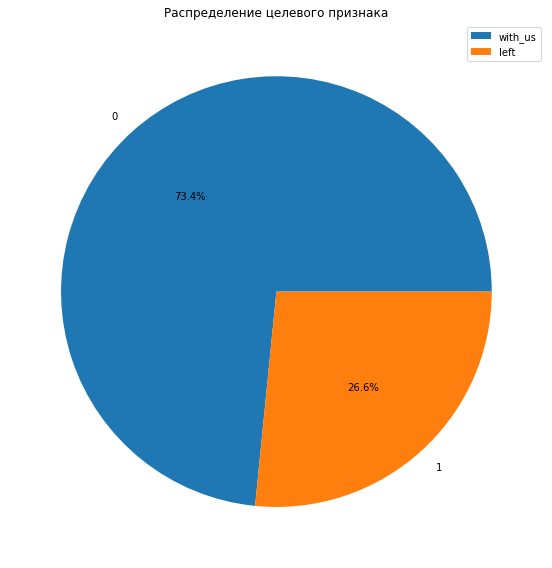

In [44]:
contract.client_left.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.legend(['with_us', 'left'])
plt.title('Распределение целевого признака')
plt.tight_layout()
plt.axis('off')

В итоге ушли от оператора связи 26.6 % пользователей. Давайте посмотрим какие услуги они получали и сколько платили за предоставляемые услуги. Для начала выделим в отдельные датасеты ушедших и оставшихся клиентов

In [45]:
full_df.loc[full_df['internetservice'].isnull(), 'type_service'] = 'only_internet'
full_df.loc[full_df['multiplelines'].isnull(), 'type_service'] = 'only_phone'
full_df['type_service'].fillna('both', inplace=True)
full_df.fillna(-1, inplace=True)

In [46]:
client_left = full_df[full_df['client_left'] == 1]
client_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7030
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        1869 non-null   object 
 1   type              1869 non-null   object 
 2   paperlessbilling  1869 non-null   object 
 3   paymentmethod     1869 non-null   object 
 4   monthlycharges    1869 non-null   float64
 5   totalcharges      1869 non-null   object 
 6   client_left       1869 non-null   int64  
 7   time_with_us      1869 non-null   int64  
 8   seniorcitizen     1869 non-null   int64  
 9   partner           1869 non-null   int64  
 10  dependents        1869 non-null   int64  
 11  is_male           1869 non-null   int64  
 12  internetservice   1869 non-null   object 
 13  onlinesecurity    1869 non-null   float64
 14  onlinebackup      1869 non-null   float64
 15  deviceprotection  1869 non-null   float64
 16  techsupport       1869 non-null   float64


In [47]:
still_client = full_df[full_df['client_left'] == 0]
still_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5163 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5163 non-null   object 
 1   type              5163 non-null   object 
 2   paperlessbilling  5163 non-null   object 
 3   paymentmethod     5163 non-null   object 
 4   monthlycharges    5163 non-null   float64
 5   totalcharges      5163 non-null   object 
 6   client_left       5163 non-null   int64  
 7   time_with_us      5163 non-null   int64  
 8   seniorcitizen     5163 non-null   int64  
 9   partner           5163 non-null   int64  
 10  dependents        5163 non-null   int64  
 11  is_male           5163 non-null   int64  
 12  internetservice   5163 non-null   object 
 13  onlinesecurity    5163 non-null   float64
 14  onlinebackup      5163 non-null   float64
 15  deviceprotection  5163 non-null   float64
 16  techsupport       5163 non-null   float64


Выделим клиентов которые получали только интернет услуги, только телефонию и тех, кто получал обе услуги

(-1.25, 1.25, -1.25, 1.25)

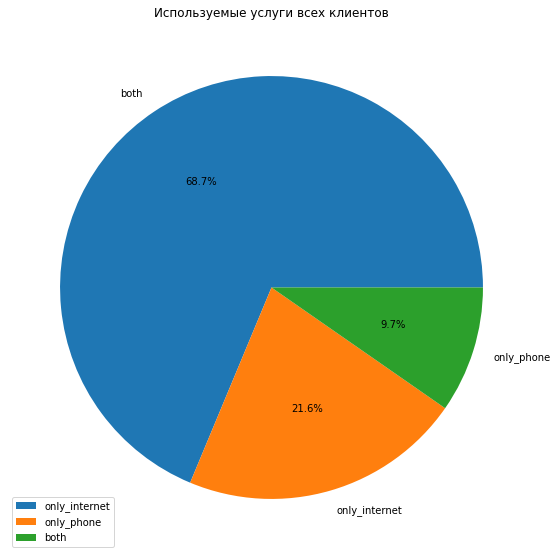

In [48]:
full_df.type_service.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.legend(['only_internet', 'only_phone', 'both'])
plt.title('Используемые услуги всех клиентов')
plt.tight_layout()
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

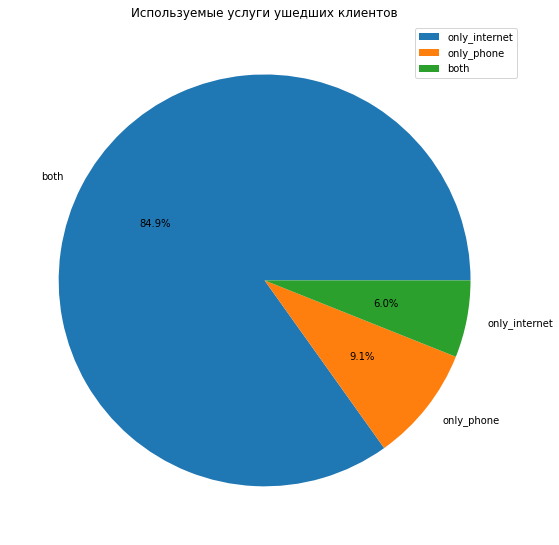

In [49]:
client_left.type_service.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.legend(['only_internet', 'only_phone', 'both'])
plt.title('Используемые услуги ушедших клиентов')
plt.tight_layout()
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

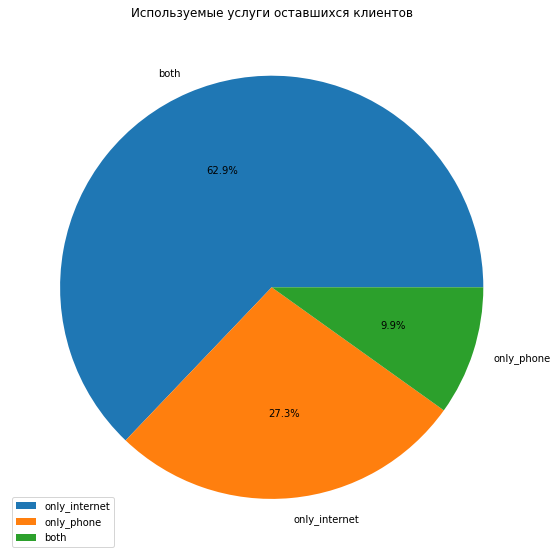

In [50]:
still_client.type_service.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.legend(['only_internet', 'only_phone', 'both'])
plt.title('Используемые услуги оставшихся клиентов')
plt.tight_layout()
plt.axis('off')

In [51]:
full_df['type'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Можно предположить, что ушедшим клиентам не объяснили, что услугами можно пользоваться не комплексом, а конкретно интернетом или телефонией

Посмотрим как обстоят дела с оплатой услуг

(-1.25, 1.25, -1.25, 1.25)

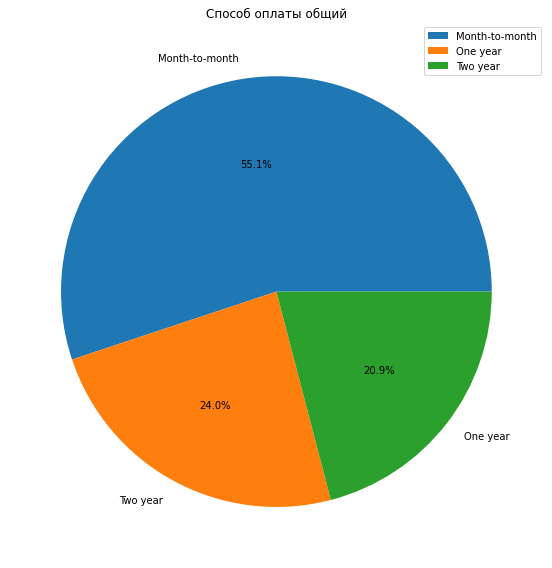

In [52]:
full_df.type.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.legend(['Month-to-month', 'One year', 'Two year'])
plt.title('Способ оплаты общий')
plt.tight_layout()
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

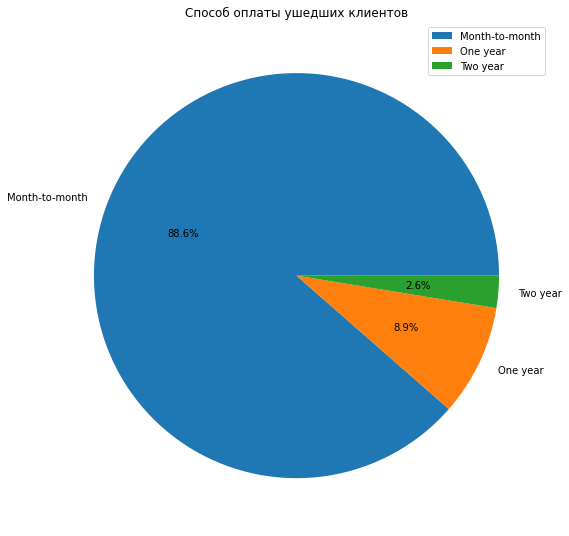

In [53]:
client_left.type.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.legend(['Month-to-month', 'One year', 'Two year'])
plt.title('Способ оплаты ушедших клиентов')
plt.tight_layout()
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

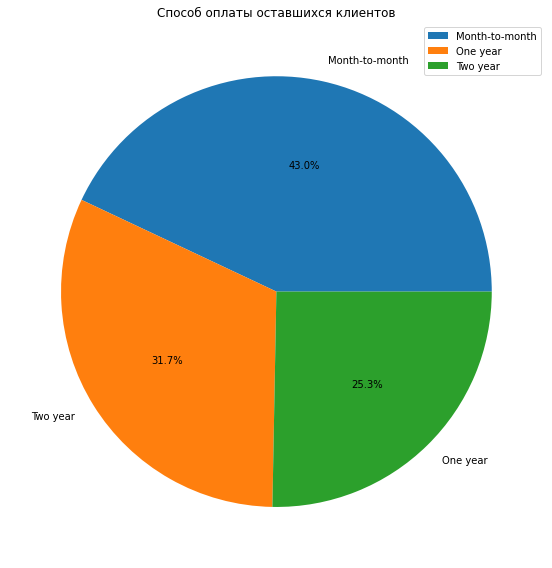

In [54]:
still_client.type.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.legend(['Month-to-month', 'One year', 'Two year'])
plt.title('Способ оплаты оставшихся клиентов')
plt.tight_layout()
plt.axis('off')

Возможно ушедшим клиентам не предлагали возможности оплаты за год или два года

## Обучение модели

In [55]:
full_data = full_df.iloc[:,3:]
full_data.head()

,paymentmethod,monthlycharges,totalcharges,client_left,time_with_us,seniorcitizen,partner,dependents,is_male,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,numofservices,multiplelines,totalcharcges,type_service
0,Electronic check,29.85,29.85,0,31,0,1,0,0,DSL,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,29.85,only_phone
1,Mailed check,56.95,1889.5,0,1036,0,0,0,1,DSL,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1889.50,both
2,Mailed check,53.85,108.15,1,61,0,0,0,1,DSL,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,108.15,both
3,Bank transfer (automatic),42.30,1840.75,0,1371,0,0,0,1,DSL,1.0,0.0,1.0,1.0,0.0,0.0,3.0,-1.0,1840.75,only_phone
4,Electronic check,70.70,151.65,1,61,0,0,0,0,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.65,both


In [56]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   paymentmethod     7032 non-null   object 
 1   monthlycharges    7032 non-null   float64
 2   totalcharges      7032 non-null   object 
 3   client_left       7032 non-null   int64  
 4   time_with_us      7032 non-null   int64  
 5   seniorcitizen     7032 non-null   int64  
 6   partner           7032 non-null   int64  
 7   dependents        7032 non-null   int64  
 8   is_male           7032 non-null   int64  
 9   internetservice   7032 non-null   object 
 10  onlinesecurity    7032 non-null   float64
 11  onlinebackup      7032 non-null   float64
 12  deviceprotection  7032 non-null   float64
 13  techsupport       7032 non-null   float64
 14  streamingtv       7032 non-null   float64
 15  streamingmovies   7032 non-null   float64
 16  numofservices     7032 non-null   float64


Построим корреляцию Пирсона для числовых признаков

In [57]:
number = full_data.drop(['paymentmethod', 'seniorcitizen', 'partner', 'dependents', 'is_male',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'numofservices',
       'multiplelines', 'type_service'], axis=1)

In [58]:
def color_values(val):
    color = 'green' if ((val > 0.6) or (val < -0.6)) else 'black'
    return 'color: %s' % color
number_corr = number.corr()
number_corr.style.applymap(color_values)

,monthlycharges,client_left,time_with_us,totalcharcges
monthlycharges,1.000000,0.192858,0.246715,0.651065
client_left,0.192858,1.000000,-0.354496,-0.199484
time_with_us,0.246715,-0.354496,1.000000,0.825811
totalcharcges,0.651065,-0.199484,0.825811,1.000000


<AxesSubplot:>

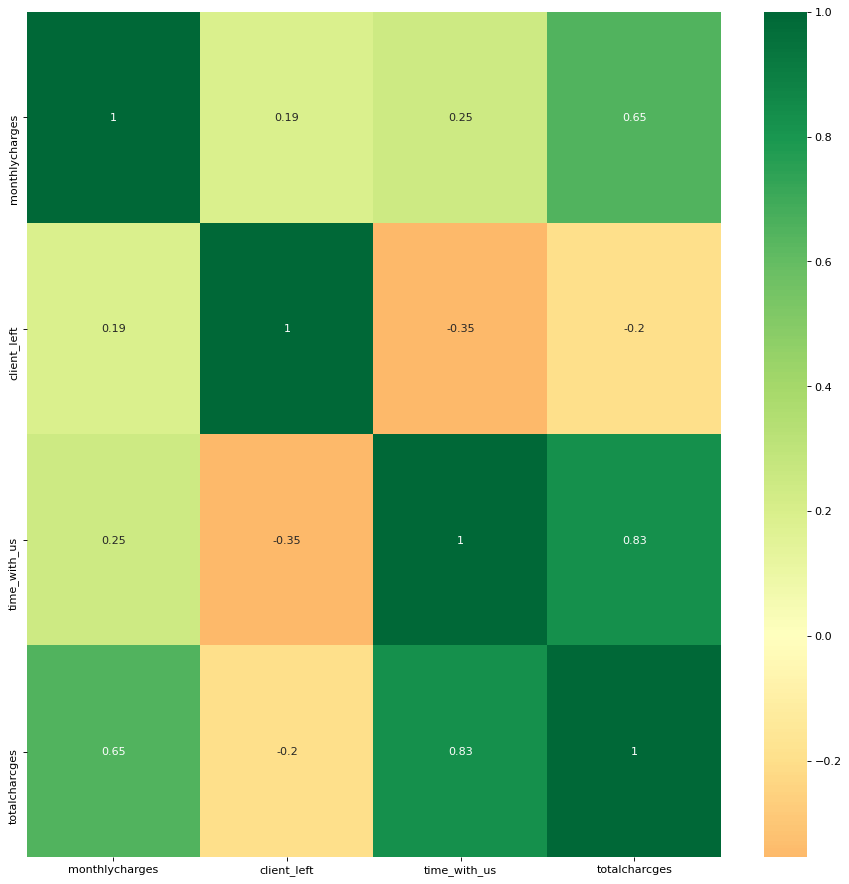

In [59]:
plt.figure(figsize=(14,14), dpi= 80)
sns.heatmap(number.corr(),  cmap='RdYlGn', center=0, annot=True)

Как мы видим общий платеж сильно зависит от времени после заключения договора между клиентом и оператом связи. Соответственно общий платеж также сильно зависит от месячного. А вот целевой признак мало зависим от вышеперечисленных признаков

Для дальнейшей работы и обучения модели в том числе разделим наш датасет на выборки

In [60]:
features = full_data.drop(['client_left'], axis=1)
target = full_data['client_left']

In [61]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   paymentmethod     7032 non-null   object 
 1   monthlycharges    7032 non-null   float64
 2   totalcharges      7032 non-null   object 
 3   time_with_us      7032 non-null   int64  
 4   seniorcitizen     7032 non-null   int64  
 5   partner           7032 non-null   int64  
 6   dependents        7032 non-null   int64  
 7   is_male           7032 non-null   int64  
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   float64
 10  onlinebackup      7032 non-null   float64
 11  deviceprotection  7032 non-null   float64
 12  techsupport       7032 non-null   float64
 13  streamingtv       7032 non-null   float64
 14  streamingmovies   7032 non-null   float64
 15  numofservices     7032 non-null   float64
 16  multiplelines     7032 non-null   float64


In [62]:
cat_features = ['paymentmethod', 'totalcharges', 'internetservice',
                'type_service']

In [63]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.25, random_state=171022)

print('Обучающая выборка:', features_train.shape)
print(target_train.shape)
print('Тестовая выборка:', features_test.shape)
print(target_test.shape)

Обучающая выборка: (5274, 19)
(5274,)
Тестовая выборка: (1758, 19)
(1758,)


Возьмем 2 модели:

- CatBoostClassifier
- RandomForestClassifier

###  Метод CatBoostClassifier

Обучим модель методом CatBoostClassifier

In [64]:
#catboost = CatBoostClassifier(loss_function='Logloss', random_seed=171022,silent=True)
#
#catboost_params = {
# 'depth': [x for x in range(1,5)],
# 'iterations': [x for x in range(100,1100, 100)],
# 'learning_rate': [0.5, 0.6, 0.7],
# 'l2_leaf_reg':[x for x in range(1,7)],
#}



#grid_search_catboost = GridSearchCV(catboost,
#                                   catboost_params, 
#                                   verbose=3,
#                                   cv=5,
#                                   n_jobs=-1,
#                                   scoring='roc_auc')


#grid_search_catboost.fit(features_train, target_train)
#grid_search_catboost.best_score_
#grid_search_catboost.best_params_

In [65]:
catboost = CatBoostClassifier(random_seed=171022, silent=True)
catboost_params = {
    'depth': [3],
    'iterations': [500],
    'learning_rate': [0.6],
    'l2_leaf_reg': [1],
}

grid_search_catboost = GridSearchCV(catboost,
                                   catboost_params,
                                   verbose=3,
                                   cv=5,
                                   n_jobs=-1,
                                   scoring='roc_auc')
grid_search_catboost.fit(features_train, target_train, cat_features=cat_features) 
grid_search_catboost.best_score_


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END depth=3, iterations=500, l2_leaf_reg=1, learning_rate=0.6; total time=   2.6s
[CV 2/5] END depth=3, iterations=500, l2_leaf_reg=1, learning_rate=0.6; total time=   2.6s
[CV 3/5] END depth=3, iterations=500, l2_leaf_reg=1, learning_rate=0.6; total time=   2.6s
[CV 4/5] END depth=3, iterations=500, l2_leaf_reg=1, learning_rate=0.6; total time=   2.6s
[CV 5/5] END depth=3, iterations=500, l2_leaf_reg=1, learning_rate=0.6; total time=   2.6s


0.9170515179527807

###  Метод RandomForestClassifier

In [66]:
features_train = pd.get_dummies(features_train)

In [67]:
#rfc = RandomForestClassifier(class_weight='balanced',
#                            bootstrap=True,
#                            random_state=171022)
#
#rfc_params = {
#    'n_estimators': range(10, 200, 10),
#    'max_depth': range(1,10),
#    'criterion': ['gini', 'entropy'],
#    'max_features': ['sqrt', 'log2']
#}

#grid_search_rfc = GridSearchCV(rfc,
#                              rfc_params, 
#                               verbose=3,
#                              cv=10,
#                              n_jobs=-1,
#                              scoring='roc_auc')

#grid_search_rfc.fit(features_train, target_train)
#grid_search_rfc.best_params_

In [68]:
rfc = RandomForestClassifier(class_weight='balanced',
                            bootstrap=True,
                            random_state=171022)
rfc_params = {
    'n_estimators': [140],
    'max_depth': [8],
    'criterion': ['entropy'],
    'max_features': ['sqrt']
}

grid_search_rfc = GridSearchCV(rfc,
                              rfc_params,
                              verbose=3,
                              cv=10,
                              n_jobs=-1,
                              scoring='roc_auc')

grid_search_rfc.fit(features_train, target_train)
grid_search_rfc.best_score_

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=140; total time=   1.3s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=140; total time=   1.2s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=140; total time=   1.2s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=140; total time=   1.2s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=140; total time=   1.2s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=140; total time=   1.2s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=140; total time=   1.2s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=140; total time=   1.3s
[CV 9/10] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=140; total time=   1.2s
[CV 10/10] END criter

0.8180859881913285

Применив для обоих моделей GridSearchCV мы нашли наилучшие гиперпараметры для моделей. Далее обучили модели и как мы видим модель CatBoostClassifier показала результат  лучше, чем RandomForestClassifier. Далее проверим CatBoostClassifier на тестовой выборке и посмотрим на Roc-кривую

### Итог

Просмотрим какой результат покажет модель CatBoostClassifier на тестовых данных

In [69]:
predict_proba = grid_search_catboost.predict_proba(features_test)[:, 1]

In [70]:
roc_auc_score(target_test, predict_proba)

0.9200556549393759

В итоге на тестовых данных модель показала результат 0.92 на тестовых данных

Чтобы выявить, как сильно наша модель отличается от случайной, посчитаем площадь под ROC-кривой — AUC-ROC

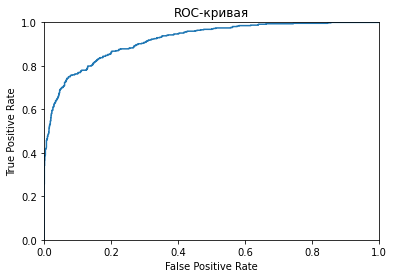

In [71]:
fpr, tpr, thresholds = roc_curve(target_test, predict_proba) # < напишите код здесь >

plt.figure()


plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-кривая")
plt.show()

Как мы видим из графика модель предсказывает не случайно.

# Вывод

На данном этапе мы построили heatmap, чтобы посмотреть на корреляцию признаков. Такая визуализация поможет найти зависимость факторов и важна для анализа. Далее мы разделили датасет на выборки, чтобы обучить наши модели на обучающей выборке, а лучшую проверить на тестовой выборке. Так как перед нами стояла задача классификации нами были выбраны модели CatBoostClassifier и RandomForestClassifier. Далее была проведена работа по поиску гиперпараметров для каждой модели с применением GridSearchCV. После мы обучили модели на тренировочной выборке и выяснили, что модель CatBoostClassifier, без использования кодирования признаков, показала результат лучше, чем модель RandomForestClassifier. Чтобы проверить ни случайны ли предсказания модели мы построили Roc-кривую и убедились, что предсказания не случайны 

## Заключение

В процессе работы над решением задачи были изучены и обработаны на предмет дубликатов, пропусков, преобразованы в нужный формат столбцы, выделен целевой признак, добавлены необходимые для анализа признаки и удалены ненужные столбцы.

Далее был проведен анализ данных. А именно таблицы были объеденены в единый датасет, было рассмотрено распределение целевого признака, выделены расторгнувшие договор клиенты, определены услуги, которыми они пользовались и их стоимость. 

После были проведены работы по обучению модели. Здесь пришлось немного отойти от изначального плана действий и была рассмотрена корреляция численных показателей, таких как ежемесячные платежи независимо от типа оплаты, продолжительность действия контракта, общая сумма платежа клиента и факт наличия контракта с оператором связи. Далее были выделены признаки и целевой признак, датасет был разделен на обучающую и тренировочную выборки. После выделения выборок были подобраны гиперпараметры для модели CatBoostClassifier с использованием GridSearchCV, была обучена модель, указав в параметрах scoring='roc_auc' мы получили результат данной метрики. На данном этапе мы столкнулись с трудностями в том, что CatBoostClassifier может обрабатывать как категориальные так и численные признаки, а для RandomForestClassifier нам пришлось кодировать признаки с использованием функции get_dummies. Далее были подобраны гиперпараметры и была обучена модель RandomForestClassifier. По полученным результатам мы поняли, что модель CatBoostClassifier лучше справилась с поставленной задачей. Мы также сделали вывод, что CatBoostClassifier не прихотлива к входящим данным и может обрабатывать как категориальные, так и численные признаки, обучается и предсказывает модель быстрее своих конкурентов. Мы проверили ее на тестовой выборке. Результат на тестовой выборке получился 0.92, что очень хорошо. Далее построили Roc-кривую, чтобы убедиться, что результат не случайный. 

Подводя итоги работы был написан краткий вывод о проделанной работе